In this program, I am going to be making two algorithms that predict the price of the NIFTY 50 index, one week from now.
I will be using following data (as of the current day):
- Close, High, Low, Open prices of the NIFTY 50 index for previous day
- Gold and oil prices for previous day
- bank interest rate data for previous day
- few indicators that have already been calculated in the excel file.

I will do following three steps to build the algorithms
- Exploratory data analysis to get deep dive on how the data is structured
- Build new features on which I can develop machine learning algorithms
- Build multiple machine learning algorithms and then merge them for best output


Below code block imports all the helper libraries into the project and prints names of all the data files in my project folder

In [60]:
import pandas as pd
pd.options.display.max_columns = 250
import numpy as np
import datetime
import calendar
import matplotlib.pyplot as plt
import os
print(os.listdir("../StockMarket/"))

['interestRate.xlsx', 'Britannia.csv', 'predictions.xlsx', 'nifty.ipynb', 'Nifty50data.csv', 'predictions.csv', 'oilprice.xlsx', 'predictions_one_month.xlsx', 'data.csv', 'interestRate.csv', '.ipynb_checkpoints', 'Nifty50dataxl.xlsx', 'brittaniaPredict.ipynb', 'gold.xlsx']


Below code block reads the data in a csv file format, which is saved locally on my computer and then prepares the data for further deep dive and exploration

In [61]:
data = pd.read_csv('../StockMarket/Nifty50data.csv')

data.drop(data.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]], inplace = True)
data.drop(["Date"], axis=1, inplace=True)
#One hot encoding for all of the categorical features
data = pd.get_dummies(data)

Printing number of rows and columns of imported data:

In [62]:
print("My sample of the stock market data for the NIFTY 50 index has ", data.shape[0], " rows and ", data.shape[1], " columns.")

My sample of the stock market data for the NIFTY 50 index has  1240  rows and  53  columns.


Printing the first 5 rows to see the various columns and the kind of values each column can have:

In [63]:
data.head(5)

,Open,High,Low,Close,Shares Traded,Turnover,MA13,PriceCrossover,PriceCrossoverSwitch,Target Close,VolumeMA7,VolumeDif,Target Close Percent,Last Week Gain,Last Week Gain Acceleration,Volatility7,Y Last Week Gain,GainFORCALC,LossFORCALC,Gain,Loss,Average Gain,Average Loss,RSI7,RSI7LOW,RSI7HIGH,Trend,PriceVolume,MA7PriceVolume,GoldPRICE,GOLDUPDOWN,OilPRICE,OilUPDOWN,GOLDOILUPDOWN,InterestRate,IntersetRateOpen,InterestRateHigh,InterestRateLow,InterestRateChange,InterestChangeUpdown,AllUpdown,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
14,7785.25,7880.50,7779.20,7874.25,126742201,6892.25,7693.300000,180.950000,0.0,7936.05,122939936.4,3.802265e+06,0.78,202.20,320.6,122.158649,-118.40,82.55,-82.55,82.55,0.0,43.671429,14.785714,73.450264,0.0,0.0,303.25,1.128006e+10,3.127515e+09,28117,-1,5944,-1,-2,8.716,8.716,8.716,8.716,-0.0058,-1,-3,0,1,0,0,0,0,0,0,0,0,0,0
15,7901.00,7918.55,7881.15,7897.50,140615189,7928.80,7700.204167,197.295833,0.0,7954.35,124422916.3,1.619227e+07,0.72,248.25,347.7,147.289733,-99.45,23.25,-23.25,23.25,0.0,46.992857,11.528571,78.951158,0.0,0.0,495.60,-4.921532e+08,3.088908e+09,28104,1,5887,-1,0,8.535,8.535,8.535,8.535,-0.0208,-1,-1,0,1,0,0,0,0,0,0,0,0,0,0
16,7915.80,7922.70,7864.05,7875.30,117321408,6234.79,7714.887500,160.412500,0.0,8027.70,127826186.7,-1.050478e+07,1.94,306.75,529.6,165.143474,-222.85,-22.20,22.20,0.00,22.2,46.992857,3.171429,91.846991,0.0,1.0,757.20,-4.751517e+09,2.751028e+09,27996,-1,5737,-1,-2,8.483,8.483,8.483,8.483,-0.0061,-1,-3,0,1,0,0,0,0,0,0,0,0,0,0
17,7875.35,7919.65,7855.95,7891.10,115221672,7502.01,7737.612500,153.487500,0.0,8083.05,127667865.1,-1.244619e+07,2.43,265.15,360.5,137.760017,-95.35,15.80,-15.80,15.80,0.0,41.050000,3.171429,90.775549,0.0,1.0,820.15,1.814741e+09,2.917058e+09,27795,1,5670,-1,0,8.512,8.512,8.512,8.512,0.0034,1,1,0,1,0,0,0,0,0,0,0,0,0,0
18,7904.55,7929.05,7900.05,7913.20,104074858,7088.03,7754.900000,158.300000,0.0,8114.60,128846307.9,-2.477145e+07,2.55,186.15,61.7,104.176960,124.45,22.10,-22.10,22.10,0.0,29.764286,3.171429,87.707851,0.0,1.0,758.05,9.002475e+08,2.386608e+09,27691,1,5710,1,2,8.516,8.516,8.516,8.516,0.0005,1,3,0,1,0,0,0,0,0,0,0,0,0,0


Printing the last 5 rows to try and see if the values change over the years. The first few rows are from around 2015, while the last few rows are from 2019.

In [64]:
data.tail(5)

,Open,High,Low,Close,Shares Traded,Turnover,MA13,PriceCrossover,PriceCrossoverSwitch,Target Close,VolumeMA7,VolumeDif,Target Close Percent,Last Week Gain,Last Week Gain Acceleration,Volatility7,Y Last Week Gain,GainFORCALC,LossFORCALC,Gain,Loss,Average Gain,Average Loss,RSI7,RSI7LOW,RSI7HIGH,Trend,PriceVolume,MA7PriceVolume,GoldPRICE,GOLDUPDOWN,OilPRICE,OilUPDOWN,GOLDOILUPDOWN,InterestRate,IntersetRateOpen,InterestRateHigh,InterestRateLow,InterestRateChange,InterestChangeUpdown,AllUpdown,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
1249,11018.15,11034.20,10906.65,10918.70,557867906,16747.99,10988.31250,-69.612500,-1.0,11023.25,491690043.7,6.617786e+07,0.96,-113.75,-60.80,99.104122,-52.95,-98.30,98.30,0.0,98.30,29.321429,45.571429,38.635294,0.0,0.0,-1025.05,-5.547996e+10,-2.825802e+10,37550,1,4022,1,2,6.560,6.583,6.583,6.534,-0.0027,-1,1,0,1,0,0,0,0,0,0,0,0,0,0
1250,10905.30,10908.25,10718.30,10741.35,668193449,18764.38,10983.20417,-241.854167,0.0,10797.90,502460941.4,1.657325e+08,0.53,-368.30,-359.95,111.763306,-8.35,-177.35,177.35,0.0,177.35,18.292857,70.907143,20.280329,0.0,0.0,-1024.05,-1.095500e+11,-4.557991e+10,37668,1,3984,-1,0,6.554,6.585,6.586,6.531,-0.0009,-1,-1,0,1,0,0,0,0,0,0,0,0,0,0
1251,10699.60,10862.55,10637.15,10829.35,667079625,20983.75,10961.87083,-132.520833,0.0,10844.65,521050925.1,1.460287e+08,0.14,-96.50,-42.35,193.090337,-54.15,88.00,-88.00,88.0,0.00,30.864286,44.650000,40.337939,0.0,0.0,-1023.05,8.655358e+10,-1.415929e+10,37599,-1,3969,-1,-2,6.564,6.567,6.578,6.551,0.0015,1,-1,0,1,0,0,0,0,0,0,0,0,0,0
1252,11000.30,11070.30,10756.55,11057.85,684141923,22375.99,10959.10000,98.750000,1.0,10847.90,527114493.4,1.570274e+08,-1.90,28.45,-3.60,195.448331,32.05,228.50,-228.50,228.5,0.00,48.714286,44.650000,51.623647,0.0,0.0,-1022.05,3.937237e+10,-1.044564e+10,38578,1,3885,-1,0,6.472,6.501,6.526,6.472,-0.0140,-1,-1,0,1,0,0,0,0,0,0,0,0,0,0
1253,11106.55,11141.75,11049.50,11105.35,685551267,27413.16,10968.23333,137.116667,0.0,10946.20,551771665.9,1.337796e+08,-1.43,57.55,-127.65,195.313342,185.20,47.50,-47.50,47.5,0.00,52.871429,44.650000,53.664902,0.0,0.0,-1021.05,-8.226615e+08,-1.084235e+10,38404,-1,3872,-1,-2,6.521,6.391,6.530,6.391,0.0076,1,-1,0,1,0,0,0,0,0,0,0,0,0,0


Creating a few plots to visualize the data and make sense:

Let's see how previous day's close price correlates with next week's close price, which is what we want to predict

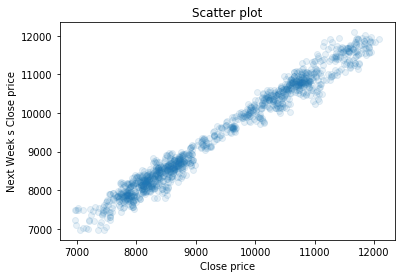

In [65]:
plt.scatter(data['Close'], data['Target Close'], alpha=0.1)
plt.xlabel('Close price')
plt.ylabel('Next Week s Close price')
plt.title('Scatter plot')
plt.show()

Interesting, this previous day's close price strongly determines next week's close price.


Now let's see how the gold price relates with next week's close price (which is what we want to predict).

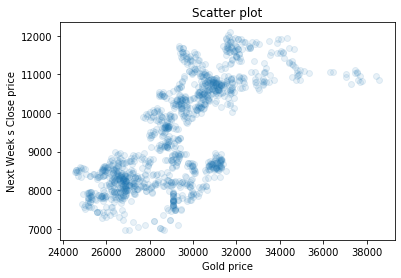

In [66]:
plt.scatter(data['GoldPRICE'], data['Target Close'], alpha=0.1)
plt.xlabel('Gold price')
plt.ylabel('Next Week s Close price')
plt.title('Scatter plot')
plt.show()

It seems to be that as the gold price increases, next week's index price also increases. However, the trend is not linear but it is more logarithmic.

Now let us see the frequency of the different values that the RSI indicator takes in the data.

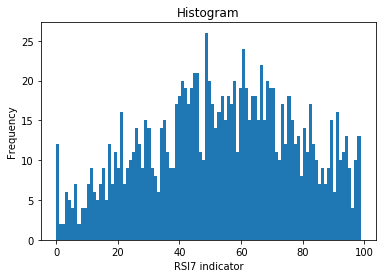

In [67]:
plt.hist(data['RSI7'], bins=100)
plt.xlabel('RSI7 indicator')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

The mean, median and mode of the RSI indicator is around 50, indicating that the NIFTY 50 index is relatively stable.

Now let us visualize how volatile the NIFTY 50 index is.

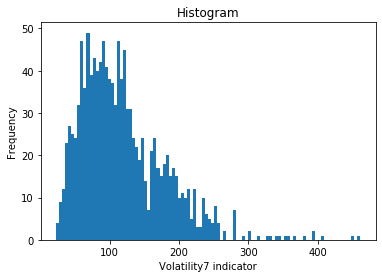

In [68]:
plt.hist(data['Volatility7'], bins=100)
plt.xlabel('Volatility7 indicator')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

Even the volatility plot shows that the index is rarely very volatile, so it is a stable index.

Now we are done with exploratory data analysis, so we will move onto building new features.

Below code block manipulates the data to create a few more features so that the algorithm can understand the market better.

In [69]:
data["VolumeMulti"] = data["VolumeDif"] * data["RSI7HIGH"] + data["VolumeDif"] * -1 * data["RSI7LOW"]

In [70]:
data["PriceVolume"] = data["Shares Traded"] * (data["Close"] - data["Open"])

In [71]:
from sklearn.metrics import mean_absolute_error

Now that we are done with creating new features, we have to split the data into a train set, which my model will see and learn from, and a test set from which I will test whether the algorithm is working or not. </br>
For the test set, I am choosing random days over the course of 5 years as it will represent different time periods. 

In [72]:
y = data["Target Close"]
from sklearn.model_selection import train_test_split
#model_data = data.drop(["Open", "High", "Low", "Shares Traded", "Turnover", "VolumeDif", "Target Close", "Target Close Percent", "GainFORCALC", "LossFORCALC", "Gain", "Loss", "Average Gain", "Average Loss", "Trend", "MA7PriceVolume", "Volatility7"], axis=1)
model_data = data.drop(["Target Close", "Target Close Percent", "Trend"], axis=1)

x_valid = model_data.tail(30)
y_valid = y.tail(30)
x_train = model_data.drop(model_data.tail(30).index)
y_train = y.drop(model_data.tail(30).index)

x_train, x_test, y_train, y_test = train_test_split(model_data, y, train_size=0.8)

Now I will be making 2 algorithms. Each will be using a different library that uses different formulas to learn. After that, I will be averaging the predictions. This is similar to taking votes from two different people and finding the common consensus on what the prediction should be. <br>

The first code block uses the scikitlearn library and implements the RandomForest formula.

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
forest = RandomForestRegressor(n_estimators=10, max_depth=8, criterion='mae')
x = model_data # , "VolumeMA7"

forest.fit(x_train, y_train)
forest_preds = forest.predict(x_valid)

print(mean_absolute_error(y_valid, forest.predict(x_valid)))
print(mean_absolute_error(y_train, forest.predict(x_train)))


77.79950000000038
61.97606854838711


Looks like this algorithm is doing well. The error is only 59.86 for the test set that I had made above. <br>

Now I will be using lightgbm (which is made by Microsoft). This uses a gradient boosting forumla for learning.

In [74]:
import lightgbm as lgb

params = {}

params['boosting_type'] = 'gbdt'
params['objective'] = 'poisson'
params['metric'] = 'mae'
params['num_leaves'] = 100
params['feature_fraction'] = 0.99

from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, train_size=0.8)
#params['lambda_l1'] = 10
#params['lambda_l2'] = 10
#params['max_bin'] = 100       
d_train = lgb.Dataset(x_train, label=y_train)

clf = lgb.train(params, d_train, 2000) 
clf_preds = clf.predict(x_valid)
print(mean_absolute_error(y_valid, clf.predict(x_valid)))
print(mean_absolute_error(y_train, clf.predict(x_train)))

21.69551480984016
0.19021196953664066


This algorithm is better compared to the first one, but put together, they should do even better.

In [81]:
x_valid['Target'] = y_valid
x_valid['preds'] = (clf_preds + forest_preds) / 2

x_valid.to_csv("predictions.csv",index=False)

/Users/yush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now I am going to save my predictions onto my computer so that I can calculate how much profit this algorithm can make. I will be using Microsoft Excel for this.

In [84]:
x_valid.to_csv("predictions.csv",index=False)